# Первое задание
по курсу "Геометрические методы анализа данных".

Решения присылайте в формате ipynb до 23:59:59 мск 06.10.2020 на адрес yanovich.yury@ya.ru. Файл назовите ГМАД-Задание-1-<Фамилия>, например, ГМАД-Задание-1-Янович. Если предполагаете коллизию с коллегами, то можете дополнить название необходимой информацией после фамилии. Пожелания, замечания и предложения приветствуются, но не носят обязательного характера.

In [200]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Задание

Косинусным расстоянием между линейными подпространствами $\mathcal{A} = \texttt{span}\{a_1, \dots, a_d\} \subset \mathbf{R}^D$ и $\mathcal{B} = \texttt{span}\{b_1, \dots, b_d\} \subset \mathbf{R}^D$ одинаковой размерности $d$, заданными своими ортонормированными базисами $\{a_1, \dots, a_d\}$ и $\{b_1, \dots, b_d\}$, называется
$$\cos(\mathcal{A}, \mathcal{B}) = \sqrt{\texttt{det}(W^TW)},$$
где $W = \left(a_i^T b_j\right)_{i,j=1}^d$ -- матрица попарных скалярный произведений, $d \leq D$.

Пусть в задании векторы являются столбцами, но записываются в строках матриц. Например,
$A = (a_1|\dots|a_d)^T \in \mathbf{R}^{d \times D}$ и $B = (b_1|\dots|b_d)^T \in \mathbf{R}^{d \times D}$ -- матрицы из $d$ строк и $D$ столбцов.

### 1. (1 балл) Выразить косинусное расстояние через матрицы $A$ и $B$.

$cos(A,B) = \sqrt{det(B A^T A B^T)}$

Косинусное расстояние можно интерпретировать как отношения объема $V(\pi_\mathcal{B}A)$ проекции параллелепипеда из направляющих векторов подпространства $\mathcal{A}$ на подпространство $\mathcal{B}$ к объему параллелепипеда $V(A)$ из направляющих векторов подпространства $\mathcal{A}$ (подпространства $\mathcal{A}$ и $\mathcal{B}$ перестановочны в данной записи):
$$\cos(\mathcal{A}, \mathcal{B}) = \frac{V(\pi_\mathcal{B}A)}{V(A)}.$$

### 2. (1 балл) Реализовать функцию вычисления косинусного расстояния по матрицам $A$ и $B$ для произвольных $d \leq D \leq 100$ и построить графики зависимости косинусного расстояния от параметра $\varphi \in [0, 2 \pi)$ для подпрастранств

2.1 $$A = 
\bigl(\begin{smallmatrix}
     1 & 0 \\ 
     0 & 1\\ 
     0 & 0
\end{smallmatrix}\bigr)^T$$ и
$$B = 
\bigl(\begin{smallmatrix}
     \cos(\varphi) & \sin(\varphi) \\ 
     0 & 0\\ 
     -\sin(\varphi) & \cos(\varphi)
\end{smallmatrix}\bigr)^T.$$
2.2 $$A = 
\bigl(\begin{smallmatrix}
     \cos(\varphi) & \sin(\varphi) \\ 
     -\sin(\varphi) & \cos(\varphi)\\ 
     0 & 0 \\ 
     0 & 0
\end{smallmatrix}\bigr)^T$$ и
$$B = 
\bigl(\begin{smallmatrix}
     \cos(\varphi) & -\sin(\varphi) \\ 
     0 & 0\\ 
     0 & 0\\ 
     \sin(\varphi) & \cos(\varphi)
\end{smallmatrix}\bigr)^T.$$

In [201]:
def cos_dist(A,B):
    W = np.dot(A , B.T)
    #print(W.shape)
    s = np.dot(W.T, W)
    return np.sqrt(np.linalg.det(s))

## 2.1

In [202]:
A = np.array([[1,0] , [0,1] , [0,0]])
A = A.T

In [203]:
print(A)

[[1 0 0]
 [0 1 0]]


In [204]:
def get_B_1(phi):
    b = np.array([[np.cos(phi)  , np.sin(phi)] ,[0,0] ,  [-np.sin(phi), np.cos(phi)] ] ).T
    return b

In [205]:
print(get_B_1(4))

[[-0.65364362  0.          0.7568025 ]
 [-0.7568025   0.         -0.65364362]]


In [206]:
x = np.linspace(0,2*math.pi,1000)

In [207]:
dis = []
A = np.array([[1,0] , [0,1] , [0,0]])
A = A.T
for i in x:
    B = get_B_1(i)
    dis.append(cos_dist(A,B))

<ipython-input-201-623a93cc0595>:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.linalg.det(s))


# __2.2__

In [208]:
def get_B_2(phi):
    b = np.array([[np.cos(phi) , -np.sin(phi)] , [0,0] , [0,0] , [np.sin(phi) ,np.cos(phi)]] ).T
    return b
def get_A_2(phi):
    b = np.array([[np.cos(phi) , np.sin(phi)] , [-np.sin(phi) , np.cos(phi)]  , [0,0] , [0,0] ]).T
    return b

In [209]:
x = np.linspace(0,2*math.pi,1000)
dis_2 = []

for i in x:
    B = get_B_2(i)
    A = get_A_2(i)
    dis_2.append(cos_dist(A,B))

<ipython-input-201-623a93cc0595>:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.linalg.det(s))


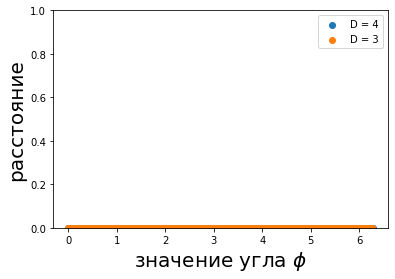

In [210]:
plt.figure()
plt.scatter(x ,dis_2 , label = 'D = 4')
plt.scatter(x ,dis , label = 'D = 3')
plt.legend()
plt.ylim((0,1))
plt.xlabel('значение угла $\phi$' , size = 20)
plt.ylabel('расстояние', size = 20)
plt.show()

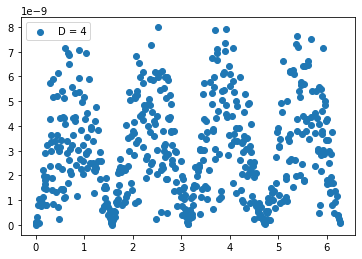

In [214]:
plt.scatter(x ,dis_2 , label = 'D = 4')
plt.legend()

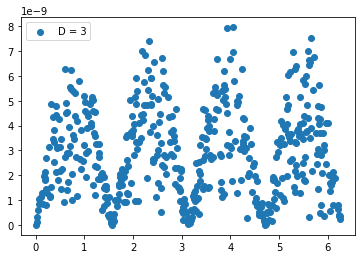

In [213]:
plt.scatter(x ,dis , label = 'D = 3')
plt.legend()

### 3. (1 балл) Рассмотрим семейство двумерных поверхностей $\mathcal{M}_{\alpha, \beta}$  в трехмерном пространстве, проходящих через точку $x_0 = (10, 10, 10)^T \in \mathbf{R}^3$, и представимых в виде
$$\mathcal{M} = \{x \;\; | \;\; \exists u,v \in [-1, 1] \colon x = f(u, v) = x_0 + (u, v, \alpha u^2 + \beta v^2)^T\} \subset \mathbf{R}^3.$$

### Требуется реализовать функцию -- генератор случайных точек $X$ с многообразия $\mathcal{M}_{\alpha, \beta}$, -- на вход которой передаются параметры $\alpha, \beta$ и размер выборки $N$, а на выходе -- выборка (матрица, точки записаны по строкам) из $N$ iid точкек $X_1, \dots, X_N$ с распределением $X = f(u,v)$, где $(u, v)$ -- равномерно распределены на $[-1,1]^2$ генератор случайных точек $X$ с многообразия $\mathcal{M}_{\alpha, \beta}$. Затем построить диаграмму рассеяния выборки для $\alpha = -\beta = 1$ и $N = 100$.

In [145]:
x = np.random.rand(3,3)
x = x*2 - 1

In [146]:
x

array([[ 0.30596234, -0.02949603, -0.83805105],
       [-0.88265314, -0.38354392, -0.17433004],
       [-0.24864089,  0.58519482, -0.64825746]])

In [147]:
x_0 = np.array([[10,10,10]])
x = np.repeat(x_0 , 10,  axis = 0)

In [148]:
def create(alpfa , beta , N):
    x_0 = np.array([[10,10,10]])
    x_0 = np.repeat(x_0 , N,  axis = 0).T
    u = np.random.rand(N)
    u = u*2 - 1
    v = np.random.rand(N)
    v = v*2 - 1
    f = x_0 + np.array([u , v , alpfa*u**2 + beta*v**2])
    return  (f[0] , f[1] , f[2])
    
     

In [149]:
from mpl_toolkits.mplot3d import Axes3D

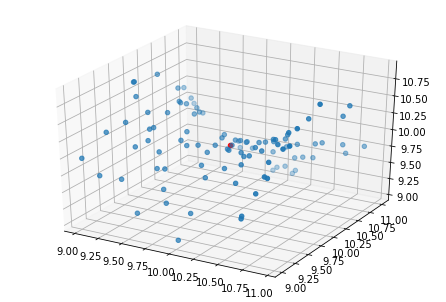

In [150]:
a = create(1 , -1 , 100)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*a)
ax.scatter(10,10,10 , c='r')
plt.show()

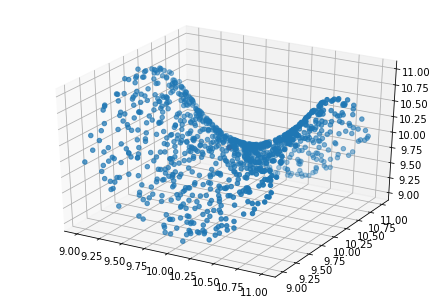

In [151]:

a = create(1 , -1 , 1000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*a)
ax.scatter(10,10,10 , c='r')
plt.show()

### 4. (4 балла) Реализовать функцию, оценивающую касательное пространство к многообразию $\mathcal{M}_{\alpha, \beta}$ в точке $x_0$ по выборке $X_1, \dots, X_N$ локальным методом главных компонент (вход: выборка $X_1, \dots, X_N$ и ширина ядра $h$; выход: базисные векторы полученной оценки). В качестве ядра использовать $k_h(x, y) = \exp(-(x-y)^T(x-y)/(2 h^2))$. 
### Построить зависимость расстояния оценки от истинного касательного пространства (базис в истинном касательном пространстве выписывается аналитически) от $\ln(h)$ для $\mathcal{M}_{1, 1}$ и $N = 100$.

In [152]:
def K_h(x ,y , h):
    return np.exp(-(x-y)@(x-y).T/(2*h**2))

In [153]:
def get_covv(X , x_0 , h):
    s = 0
    
    for i in X:
        s += K_h(i , x_0,h)*(i - x_0).T@ ((i-x_0))
    s /= len(X)
    
    return s

In [154]:
def get_X(a,b,n):
    return np.array(create(a,b,n)).T

In [155]:
def get_vecs(s):
    u,s,v = np.linalg.svd(s)
    return (u[0],u[1])

In [156]:
# def get_2_vec(n , x_0):
#     d =  (n@x_0.T)
#     z_1 = d/n[2]
#     x_2 = d/n[0]
#     p_1 = np.array([0,0 , z_1])
#     p_2 = np.array([x_2 , 0 ,0])
#     v_1 = x_0 - p_1
#     v_2 = x_0 - p_2
#     v_1 /= np.linalg.norm(v_1)
#     v_2 = v_2 - v_1*(v_1@v_2.T)
#     v_2 /= np.linalg.norm(v_2)
#     return(v_1 , v_2)

In [157]:
a_0 = np.array([[1,0,0] , [0,1,0]]) 

In [158]:
x_0 = np.array([[10,10,10]])
X = get_X(1,1,1000)
s =get_covv(X , x_0  , 10)
b = get_vecs(s)

In [159]:
h =10

In [160]:
c = np.vstack(b)

In [161]:
c

array([[-0.13176074, -0.31815969, -0.93883626],
       [ 0.0454035 ,  0.94416248, -0.32633683]])

In [162]:
x_0 = np.array([[10,10,10]])
X = get_X(1,1,1000)

In [163]:
dist =[]

x_0 = np.array([[10,10,10]])
X = get_X(1,1,1000)


a_0 = np.array([[1,0,0] , [0,1,0]])    #истинная касательая 
for h in np.linspace(0.00001,10,1000):
    x_0 = np.array([[10,10,10]])
    s =get_covv(X , x_0  , h)
    x_0 = np.array([10,10,10])
    a = get_vecs(s)
    
    c = np.vstack(a)
    dist.append(cos_dist(a_0 ,c))

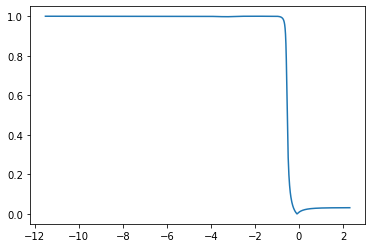

In [164]:
plt.plot(np.log(np.linspace(0.00001,10,1000)),dist)

### 5. (3 балла) Построить зависимость оптимальной (минимизирует расстояние до истинного касательного пространства) ширины ядра $h^*$ от логарифма размера выборки для $\mathcal{M}_{1, 1}$, $\mathcal{M}_{1, -1}$ и $\mathcal{M}_{1, 0}$. Сделать вывод характере построеной зависимосити.

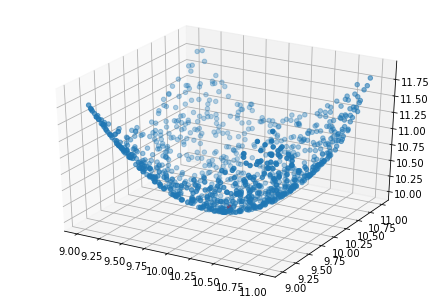

In [165]:
a = create(1 , 1 , 1000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*a)
ax.scatter(10,10,10 , c='r')
plt.show()

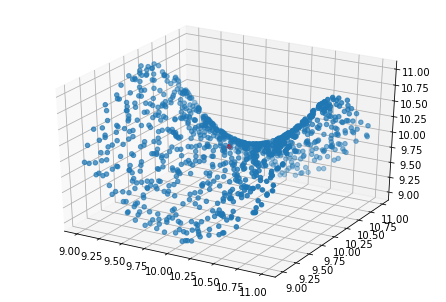

In [166]:
a = create(1 , -1 , 1000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*a)
ax.scatter(10,10,10 , c='r')
plt.show()

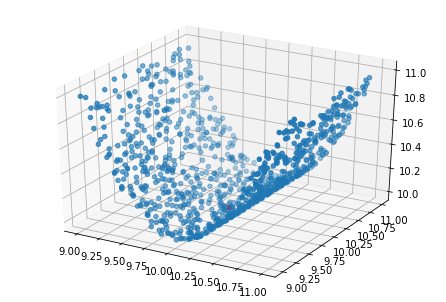

In [167]:
a = create(1 ,  0, 1000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*a)
ax.scatter(10,10,10 , c='r')
plt.show()

In [188]:
a_0 = np.array([[1, 0], [0, 1], [0,0]]).T  #истинная касательая 
h_opt = []
for n in  np.arange(10, 2000, 10):
    x_0 = np.array([[10,10,10]])
    X = get_X(1,1,int(n))
    dist = []
    
    grid = np.linspace(1e-2,10,100)
    for h in grid:
        x_0 = np.array([[10,10,10]])
        s =get_covv(X , x_0 , h)
        x_0 = np.array([10,10,10])
        a = get_vecs(s)
        c = np.vstack(a)
        #print(c)
        dist.append(cos_dist(a_0 ,c))
    #print(1)
    h_opt.append(grid[np.argmax(dist)])

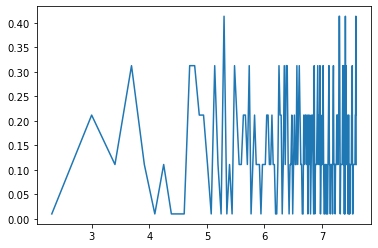

In [196]:
plt.plot( np.log(np.arange(10, 2000, 10)) , h_opt)

In [190]:
a_0 = np.array([[1, 0], [0, 1], [0,0]]).T    #истинная касательая 
h_opt_1 = []
for n in np.arange(10, 2000, 10):
    x_0 = np.array([[10,10,10]])
    X = get_X(1,-1,int(n))
    dist = []
    
    grid = np.linspace(1e-2,10,100)
    for h in grid:
        x_0 = np.array([[10,10,10]])
        s =get_covv(X , x_0  , h)
        x_0 = np.array([10,10,10])
        a = get_vecs(s)
        c = np.vstack(a)
        dist.append(cos_dist(a_0 ,c))
    #print(1)
    h_opt_1.append(grid[np.argmax(dist)])

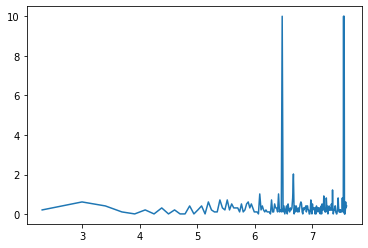

In [191]:
plt.plot(np.log(np.arange(10, 2000, 10)) , h_opt_1)

In [192]:
a_0 = np.array([[1, 0], [0, 1], [0,0]]).T   #истинная касательая 
h_opt_2 = []
for n in np.arange(10, 2000, 10):
    x_0 = np.array([[10,10,10]])
    X = get_X(1,0,int(n))
    dist = []
    
    grid = np.linspace(1e-2,10,100)
    for h in grid:
        x_0 = np.array([[10,10,10]])
        s =get_covv(X , x_0  , h)
        x_0 = np.array([10,10,10])
        a = get_vecs(s)
        c = np.vstack(a)
        dist.append(cos_dist(a_0 ,c))
    #print(1)
    h_opt_2.append(grid[np.argmax(dist)])

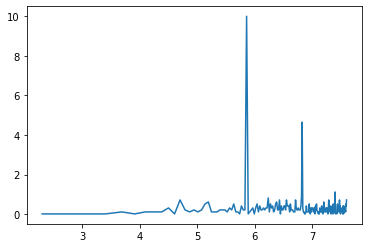

In [193]:
plt.plot(np.log(np.arange(10, 2000, 10)) , h_opt_2)

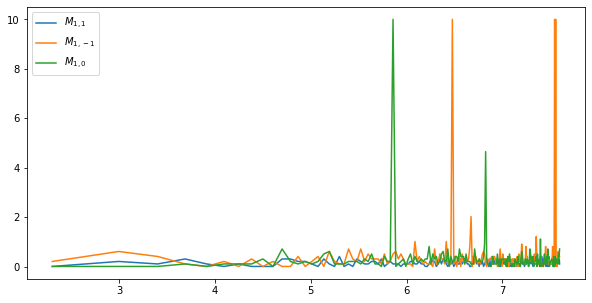

In [199]:
x_pic = np.log(np.arange(10, 2000, 10))
plt.figure(figsize=(10, 5))
plt.plot(x_pic , h_opt , label = '$M_{1,1}$')
plt.plot(x_pic , h_opt_1 ,  label = '$M_{1,-1}$')
plt.plot(x_pic , h_opt_2 ,  label = '$M_{1,0}$')
plt.legend()
plt.show()

не совсем понятно чем обусловлены эти выбросы, корее всего нестабильностью SVD разложения для плохо обусдовленной матрицы 

выводов по этим графикам к сожалению никаких сделать не могу(((

### 6*. (5 дополнительных баллов) В пункте 3 выборка равномерна по $(u, v)$, но не равномерна по поверхности. Предложить и реализовать равномерный по поверхности генератор. Возможным решением является использование метода выборки с отклонением (rejection sampling).

предлагаю метод предложенный в этой статье http://members.unine.ch/giuseppe.melfi/articoli/surfaces/gm83.pdf ))))

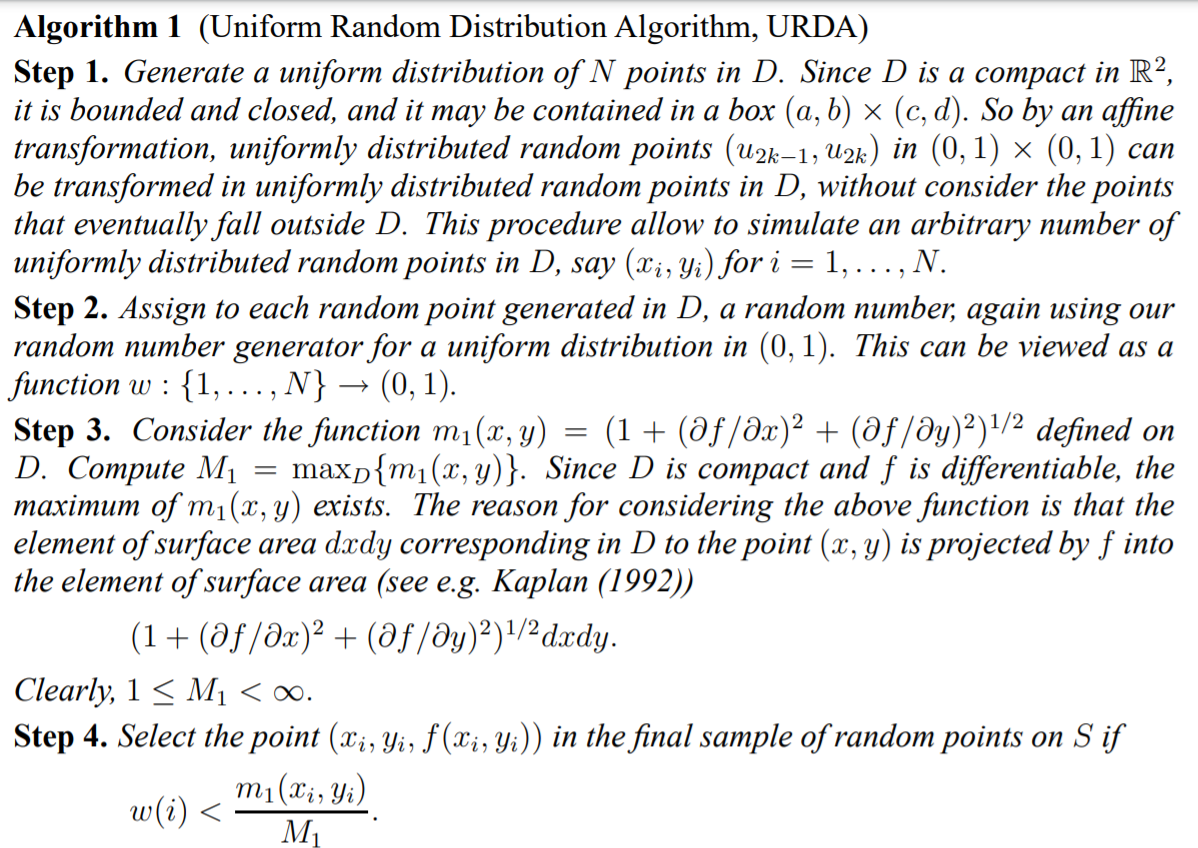

$m_1 (u,v) = (1 + 4 \alpha^2 u^2 + 4\beta^2 v^2 )$

заметим что :

$\alpha =1 ;\beta =1 ;  M_1 = 1$ 

$\alpha =1 ;\beta =-1 ;  M_1 = 1  $ 

$\alpha =1 ;\beta =0  ; M_1 = 1$ 

идея этого алгоритма крайне простая 

с помощью нормы производной оценить как сильно растянута поверхность в каждом месте пространства

а затем просто убрать точки с элементов поверхности которые растянуты не так сильно как самые растянутые 

тогда получим равномерное распределение по поверности, а не равномерное распределение проекция на плоскость ху






In [215]:
def create(alpfa , beta , N):
    x_0 = np.array([[10,10,10]])
    x_0 = np.repeat(x_0 , N,  axis = 0).T
    u = np.random.rand(N)
    u = u*2 - 1
    v = np.random.rand(N)
    v = v*2 - 1
    f = x_0 + np.array([u , v , alpfa*u**2 + beta*v**2])
    return  (f[0] , f[1] , f[2])

In [216]:
create(1,0,10)

(array([ 9.71348504,  9.28605075, 10.30225823, 10.66002885, 10.60848738,
         9.54032499, 10.36435243, 10.45743325, 10.11253616,  9.75592973]),
 array([10.92046278,  9.59182576,  9.0239931 , 10.09681545, 10.77970728,
        10.75423729,  9.30126826,  9.57794336, 10.86782749, 10.20965706]),
 array([10.08209082, 10.50972352, 10.09136004, 10.43563808, 10.37025689,
        10.21130112, 10.13275269, 10.20924517, 10.01266439, 10.0595703 ]))

In [217]:
def m_1(u , v , alpha , beta):
    return (1+ (2*alpha*u)**2 + (2*beta*v)**2 )/ ((2*alpha*1)**2 + (2*beta*1)**2) 

In [218]:
def create_uni(alpfa , beta , N):
    f_x =[]
    f_y = []
    
    
    x_0 = np.array([[10,10,10]])
#     #x_0 = np.repeat(x_0 , N,  axis = 0).T
#     u = np.random.rand(N)
#     u = u*2 - 1
#     v = np.random.rand(N)
#     v = v*2 - 1
   
    
    i = 0
    #w =  np.random.rand(N)
    while len(f_x) < N:
        u = np.random.rand(1)
        u = u*2 - 1
        v = np.random.rand(1)
        v = v*2 - 1
        w =  np.random.rand(1)
        #print(m_1(u[0] , v[0] , alpfa ,beta))
        if w < m_1(u[0] , v[0] , alpfa ,beta):
            f_x.append(u[0]) 
            f_y.append(v[0]) 
        i+=1
             
    #print(f_x)        
    u = np.array(f_x)
    v = np.array(f_y)
    x_0 = np.repeat(x_0 , len(u),  axis = 0).T
    
    f = x_0 + np.array([u , v , alpfa*u**2 + beta*v**2])
    print('regection rate = ' , N/i)     
    return (f[0] , f[1] , f[2])
        

In [219]:
a = create_uni(1,-1,1000)

regection rate =  0.4576659038901602


regection rate =  0.45745654162854527


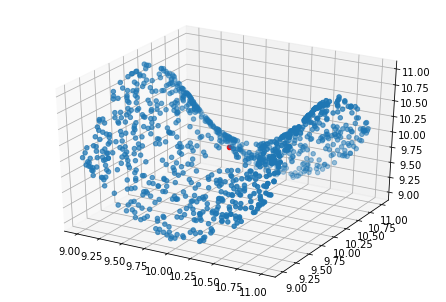

In [220]:
a = create_uni(1 , -1 , 1000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*a)
ax.scatter(10,10,10 , c='r')
plt.show()


regection rate =  0.5711022272986864


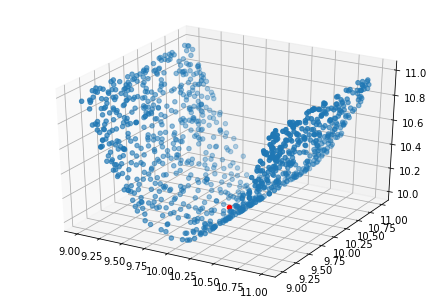

In [221]:
a = create_uni(1 , 0 , 1000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*a)
ax.scatter(10,10,10 , c='r')
plt.show()


regection rate =  0.47393364928909953


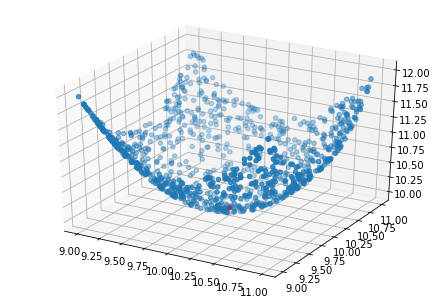

In [222]:
a = create_uni(1 , 1 , 1000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*a)
ax.scatter(10,10,10 , c='r')
plt.show()


### 7*. (5 дополнительных баллов) Предложить теоретическое объяснение для степенной зависимости $h^* = g(N)$, численно оценить степень. Совпадение теоретического и эмпирического показателей в данном пункте не требуется.

### Литература
1. Tyagi, H., Vural, E., & Frossard, P. (2013). Tangent space estimation for smooth embeddings of Riemannian manifolds®. Information and Inference: A Journal of the IMA, 2(1), 69-114.
2. Singer, A., & Wu, H. T. (2012). Vector diffusion maps and the connection Laplacian. Communications on pure and applied mathematics, 65(8), 1067-1144.
3. Diaconis, P., Holmes, S., & Shahshahani, M. (2013). Sampling from a manifold. In Advances in modern statistical theory and applications: a Festschrift in honor of Morris L. Eaton (pp. 102-125). Institute of Mathematical Statistics.